# Plot vancomycin

In [92]:
import pandas as pd
import plotnine as pn
from numpy import std
import numpy as np

import matplotlib.pyplot as plt

# Import and format

In [3]:
!ls data/vancomycin_data

plate3_data_formatted.txt  plate6_formatted.tsv  v587_formatted.tsv
plate3_metadata.txt	   plate6_metadata.txt	 v587_metadata.txt


In [16]:
def import_data(data_path, md_path):
    df = pd.read_table(data_path)
    tmp_md = pd.read_table(md_path)
    df_md = df.melt(id_vars = ["Hours", "Minutes"]).merge(tmp_md, left_on="variable",right_on="Well")
    return(df_md)

root= "data/vancomycin_data/"
plate3 = import_data( root + "plate3_data_formatted.txt", root + "plate3_metadata.txt")
plate6 = import_data( root + "plate6_formatted.tsv", root + "plate6_metadata.txt")
plateV = import_data( root + "v587_formatted.tsv", root + "v587_metadata.txt")

dat = pd.concat([plate3, plate6, plateV])

In [163]:
phages_keep = ["Bob1","Ump1","Ump2","SDS1.2","SDS2.1","CCS3.1","Wild Type"]

dat_keep = dat.query('phage in @phages_keep & `antibiotic_concentration(ug.ml)` in [0,10,20,30,40,50,100]')
dat_keep_agg = dat_keep.groupby(['strain','phage','antibiotic_concentration(ug.ml)']).agg({'value':['mean',std]})

dat_keep_agg = dat_keep_agg.reset_index()
dat_keep_agg.columns = [x[1] if x[1] != '' else x[0] for x in dat_keep_agg.columns ]

In [107]:
dat_keep_agg.head()

,strain,phage,antibiotic_concentration(ug.ml),mean,std
0,E. faecalis DP11,SDS1.2,0.0,0.499671,0.084703
1,E. faecalis DP11,SDS1.2,5.0,0.450553,0.086693
2,E. faecalis DP11,SDS1.2,10.0,0.424688,0.076686
3,E. faecalis DP11,SDS1.2,20.0,0.449550,0.083332
4,E. faecalis DP11,SDS1.2,30.0,0.342609,0.046267


/mnt/c/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 5 x 3 in image.
/mnt/c/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/vancomycin/dp11.png
/mnt/c/anaconda3/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/mnt/c/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:464: PlotnineWarning: geom_errorbar : Removed 1 rows containing missing values.
/mnt/c/anaconda3/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/mnt/c/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:464: PlotnineWarning: geom_errorbar : Removed 1 rows containing missing values.


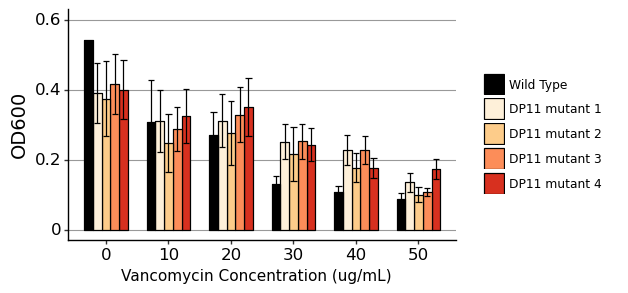

<ggplot: (8775530426305)>

In [183]:
plot_dat = dat_keep_agg.query('strain=="E. faecalis DP11" & `antibiotic_concentration(ug.ml)` != 100').copy()
plot_dat["abx"] = pd.Categorical([str(int(x)) for x in plot_dat["antibiotic_concentration(ug.ml)"]],
                                 categories=["0","10","20","30","40","50"])
phage_label_conversion = {"SDS1.2":"DP11 mutant 4",
                         "SDS2.1":"DP11 mutant 3",
                         "Ump1":"DP11 mutant 1",
                         "Ump2":"DP11 mutant 2",
                         "Wild Type":"Wild Type"}
#Subtract backgorund
plot_dat["mean"]= plot_dat["mean"] - .1

plot_dat["phage_label"] = pd.Categorical([phage_label_conversion[x] for x in plot_dat.phage],
                                        categories =["Wild Type","DP11 mutant 1","DP11 mutant 2","DP11 mutant 3","DP11 mutant 4"])
colors = ["black",'#fef0d9','#fdcc8a','#fc8d59','#d7301f']

pn.options.figure_size = 5,3


p = (pn.ggplot( data = plot_dat) +
    pn.geom_bar( pn.aes(x="abx",
                        y="mean", fill="phage_label"),
                position="dodge", stat="identity", color="black", width=.7) +
     pn.geom_errorbar( pn.aes(x="abx",
                        ymin="mean - std", ymax = "mean + std", group="phage_label"),
                position=pn.position_dodge(width=.7), color="black") +
     pn.facet_grid('.~strain', space="free",scales="free") +
     pn.scale_fill_manual(colors) +
     pn.labs(fill="", x="Vancomycin Concentration (ug/mL)", y="OD600") +
     pn.scale_y_continuous(limits=[0,.6]) +
     pn.theme_classic() +
     pn.theme(
        panel_background = pn.element_rect(color="black", fill=None),
        panel_grid_major_y = pn.element_line(color="grey", alpha=.8),
         strip_background = pn.element_blank(),
         strip_text = pn.element_blank(),
         axis_text_y = pn.element_text(size=12, color="black"),
         axis_text_x = pn.element_text(size=12, color="black"),
         axis_title_y = pn.element_text(size=14)
     )
    
    )
p.save('figures/vancomycin/dp11.png')
p

/mnt/c/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 2 x 3 in image.
/mnt/c/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/vancomycin/v587.png
/mnt/c/anaconda3/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/mnt/c/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:464: PlotnineWarning: geom_errorbar : Removed 1 rows containing missing values.
/mnt/c/anaconda3/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/mnt/c/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:464: PlotnineWarning: geom_errorbar : Removed 1 rows containing missing values.


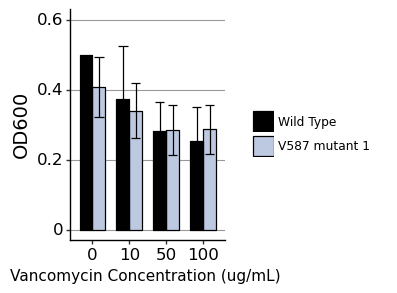

<ggplot: (8775530470663)>

In [182]:
plot_dat = dat_keep_agg.query('strain=="E. faecalis V587" ').copy()
plot_dat["abx"] = pd.Categorical([str(int(x)) for x in plot_dat["antibiotic_concentration(ug.ml)"]],
                                 categories=["0","10","20","30","40","50","100"])
phage_label_conversion = {"Bob1":"V587 mutant 1",
                         "Wild Type":"Wild Type"}
#Subtract backgorund
plot_dat["mean"]= plot_dat["mean"] - .1
plot_dat["phage_label"] = pd.Categorical([phage_label_conversion[x] for x in plot_dat.phage],
                                        categories =["Wild Type","V587 mutant 1"])
colors = ["black","#bdc9e1"]

pn.options.figure_size = 2,3


p = (pn.ggplot( data = plot_dat) +
    pn.geom_bar( pn.aes(x="abx",
                        y="mean", fill="phage_label"),
                position="dodge", stat="identity", color="black", width=.7) +
     pn.geom_errorbar( pn.aes(x="abx",
                        ymin="mean - std", ymax = "mean + std", group="phage_label"),
                position=pn.position_dodge(width=.7), color="black") +
     pn.facet_grid('.~strain', space="free",scales="free") +
     pn.scale_fill_manual(colors) +
     pn.labs(fill="", x="Vancomycin Concentration (ug/mL)", y="OD600") +
     pn.scale_y_continuous(limits=[0,.6]) +
     pn.theme_classic() +
     pn.theme(
        panel_background = pn.element_rect(color="black", fill=None),
        panel_grid_major_y = pn.element_line(color="grey", alpha=.8),
         strip_background = pn.element_blank(),
         strip_text = pn.element_blank(),
         axis_text_y = pn.element_text(size=12, color="black"),
         axis_text_x = pn.element_text(size=12, color="black"),
         axis_title_y = pn.element_text(size=14)
     )
    
    )
p.save('figures/vancomycin/v587.png')
p

/mnt/c/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 2.5 x 3 in image.
/mnt/c/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/vancomycin/yi6.png
/mnt/c/anaconda3/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/mnt/c/anaconda3/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


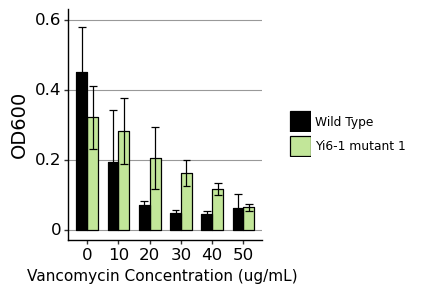

<ggplot: (8775530710155)>

In [181]:
plot_dat = dat_keep_agg.query('strain=="E. faecalis Yi6" & phage in ["CCS3.1","Wild Type"] & `antibiotic_concentration(ug.ml)` != 100').copy()
plot_dat["abx"] = pd.Categorical([str(int(x)) for x in plot_dat["antibiotic_concentration(ug.ml)"]],
                                 categories=["0","10","20","30","40","50"])
phage_label_conversion = {"CCS3.1":"Yi6-1 mutant 1",
                         "Wild Type":"Wild Type"}
#Subtract backgorund
plot_dat["mean"]= plot_dat["mean"] - .1
plot_dat["phage_label"] = pd.Categorical([phage_label_conversion[x] for x in plot_dat.phage],
                                        categories =["Wild Type","Yi6-1 mutant 1"])
colors = ["black","#c2e699"]

pn.options.figure_size = 2.5,3


p = (pn.ggplot( data = plot_dat) +
    pn.geom_bar( pn.aes(x="abx",
                        y="mean", fill="phage_label"),
                position="dodge", stat="identity", color="black", width=.7) +
     pn.geom_errorbar( pn.aes(x="abx",
                        ymin="mean - std", ymax = "mean + std", group="phage_label"),
                position=pn.position_dodge(width=.7), color="black") +
     pn.facet_grid('.~strain', space="free",scales="free") +
     pn.scale_fill_manual(colors) +
     pn.labs(fill="", x="Vancomycin Concentration (ug/mL)", y="OD600") +
     pn.scale_y_continuous(limits=[0,.6]) +
     pn.theme_classic() +
     pn.theme(
        panel_background = pn.element_rect(color="black", fill=None),
        panel_grid_major_y = pn.element_line(color="grey", alpha=.8),
         strip_background = pn.element_blank(),
         strip_text = pn.element_blank(),
         axis_text_y = pn.element_text(size=12, color="black"),
         axis_text_x = pn.element_text(size=12, color="black"),
         axis_title_y = pn.element_text(size=14)
     )
    
    )
p.save('figures/vancomycin/yi6.png')
p

In [178]:
!mkdir figures/vancomycin

In [177]:
!ls figures

Cocktails.png		MOI.png
Cocktails_vertival.png	Qpcr_timecourse_fig_minus_nohost_stats.png
Figures.pptx		Qpcr_timecourse_fig_minus_tp0_stats.png


In [ ]:
fig,axs =  plt.subplots(1,3, figsize=(10,4),gridspec_kw={'width_ratios': [1, 1,1.5]}) 


In [69]:
phages_keep = ["Bob1","CCS3.1","Ump1","Ump2","SDS1.2","SDS2.1","Wild Type"]
host_strain_dict = {'Bob1':"E. faecalis V587",
                   'CCS3.1':'E. feacalis Yi6',
                   "Ump1":"E. faecalis DP11",
                   "Ump2":"E. faecalis DP11",
                   "SDS1.2":"E. faecalis DP11",
                   "SDS2.1":"E. faecalis DP11"}

In [85]:
dat_keep_agg.head()

,Hours,Minutes,variable,value,Well,strain,mutant,phage,antibiotic,antibiotic_concentration(ug.ml),replicate
129,0.00,0.000000,A2,0.1409,A2,E. faecalis DP11,mutant,Ump1,Vancomycin,0.0,1.0
130,0.17,10.333333,A2,0.1447,A2,E. faecalis DP11,mutant,Ump1,Vancomycin,0.0,1.0
131,0.34,20.666667,A2,0.1544,A2,E. faecalis DP11,mutant,Ump1,Vancomycin,0.0,1.0
132,0.52,31.000000,A2,0.1681,A2,E. faecalis DP11,mutant,Ump1,Vancomycin,0.0,1.0
133,0.69,41.333333,A2,0.1871,A2,E. faecalis DP11,mutant,Ump1,Vancomycin,0.0,1.0


ValueError: shape mismatch: objects cannot be broadcast to a single shape

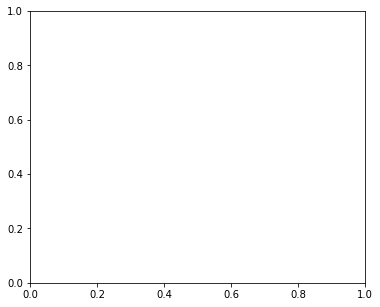

In [104]:
fig,axs =  plt.subplots(1,1, figsize=(6,5))

phage = "Ump1"
host_strain = host_strain_dict[phage]


#Set position of bar on X axis
r1 = np.array([0,5,10,20,30,40,50])
barWidth=1
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


wt_dat = dat_keep_agg.query('phage=="Wild Type" & strain == @host_strain')
phage_dat = dat_keep_agg.query('phage == @phage')

plt.bar(x=r2, height=wt_dat["mean"], color="blue")
plt.bar(x=r3, height=phage_dat["mean"], 
                      color="red")

